In [124]:
import numpy as np

np.random.seed(42)

In [125]:
import matplotlib.pyplot as plt

def draw_rectangle(start_x, start_y, end_x, end_y, line_color='black', fill_color=None, line_width=1.0):
    rect = plt.Rectangle((start_x, start_y), end_x - start_x, end_y - start_y, edgecolor=line_color, fill=fill_color is not None, linewidth=line_width, facecolor=fill_color)
    plt.gca().add_patch(rect)

def draw_line(start_x, start_y, end_x, end_y, line_color='black', line_width=1.0):
    plt.plot([start_x, end_x], [start_y, end_y], color=line_color, linewidth=line_width)

def draw_circle(center_x, center_y, radius, line_color='black', fill_color=None, line_width=1.0):
    circle = plt.Circle((center_x, center_y), radius, edgecolor=line_color, fill=fill_color is not None, linewidth=line_width, facecolor=fill_color)
    plt.gca().add_patch(circle)

In [126]:
def draw_marker(x, min_y, max_y, circle_raidus, color):
    draw_line(x, min_y, x, max_y, line_color='black', line_width=0.5)
    draw_circle(x, max_y, circle_raidus, line_color='black', fill_color=color, line_width=0.5)

def draw_fig(limits, protein_limits, markers):
    gray_x_min, gray_x_max = 0.15, 0.85
    gray_y_min, gray_y_max = 0.492, 0.508
    plt.figure(figsize=(20,20))
    colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple']

    max_x = max(np.max(limits), np.max(protein_limits), np.max(markers))
    print(max_x)
    
    # normalize into [0, 1], leaving some space on the sides
    preprocess = lambda x: (x / max_x) * (gray_x_max - gray_x_min) + gray_x_min
    protein_limits = np.array(list(map(preprocess, protein_limits)))
    limits = np.array(list(map(preprocess, limits)))
    markers = np.array(list(map(preprocess, markers)))
    
    # draw the gray bar
    draw_rectangle(gray_x_min, gray_y_min, gray_x_max, gray_y_max, line_color='gray', fill_color='gray', line_width=2.0)

    # draw markers
    marker_length = 0.02 # todo: make this dependend on how often the marker is present
    marker_radius = 0.0025 # todo: make this dependend on how often the marker is present
    marker_y_min, marker_y_max = gray_y_max, gray_y_max + marker_length
    for marker in markers:
        draw_marker(marker, marker_y_min, marker_y_max, marker_radius, np.random.choice(colors))
    
    # draw the exons
    exon_y_min, exon_y_max = 0.485, 0.515
    for exon_x_min, exon_x_max in limits:
        draw_rectangle(exon_x_min, exon_y_min, exon_x_max, exon_y_max, line_color='black', fill_color=np.random.choice(colors), line_width=2.0)
        
    # draw the protein
    protein_y_min, protein_y_max = 0.33, 0.37
    light_blue = True
    # iterate over pairs in protein_limits
    for protein_x_min, protein_x_max in [protein_limits[i:i + 2] for i in range(len(protein_limits) - 1)]:
        if light_blue:
            color = 'lightblue'
            light_blue = False
        else:
            color = 'blue'
            light_blue = True
        draw_rectangle(protein_x_min, protein_y_min, protein_x_max, protein_y_max, line_color='black', fill_color=color, line_width=2.0)
    
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.gca().set_aspect('equal')
    plt.axis('off')
    plt.show()

limits = [
    (65, 398),
    (530, 555),
    (560, 650),
    (653, 730),
    (739, 815),
    (1090, 1345)
]

limits = np.array(limits)
protein_limits = np.sort(np.concatenate((np.array([0]),np.random.randint(0, 1390, 19),np.array([1390]))))
markers = np.random.randint(0, 1390, 150)

print(limits)
print(protein_limits)
print(markers)

[[  65  398]
 [ 530  555]
 [ 560  650]
 [ 653  730]
 [ 739  815]
 [1090 1345]]
[   0   87  121  130  330  343  385  466  769  805  860  871 1044 1095
 1123 1126 1130 1238 1294 1332 1390]
[1215  955  276 1184  459 1337   21  252  747  856  474 1082  510  699
  975  189  957  686  957  562 1267  831 1154  646   20  840  166 1297
  387  600  315   13  241  776 1369  564  897 1363   91  955  508  775
   34  205 1104 1025 1021  565 1129  702  401  729  161  201  995  269
  815 1294  455 1275 1016  295  719  337  878 1076  791  216  763  187
  379  492 1064 1180   14   64  520 1367 1152  647 1086 1162  592  391
  418  288  378  230 1017   40 1051  134  200  779  929 1056 1071  502
  406  804   98  683  725  960  612  642 1028 1241  502  766  397  870
  794  392  206 1038  891  863  742 1264  563 1020   95  484  230  748
 1194  540 1059  524 1183 1266 1109  577  681  556 1012  645  795 1051
 1363 1354 1371 1254  189 1248 1306  632  627  972]


1390


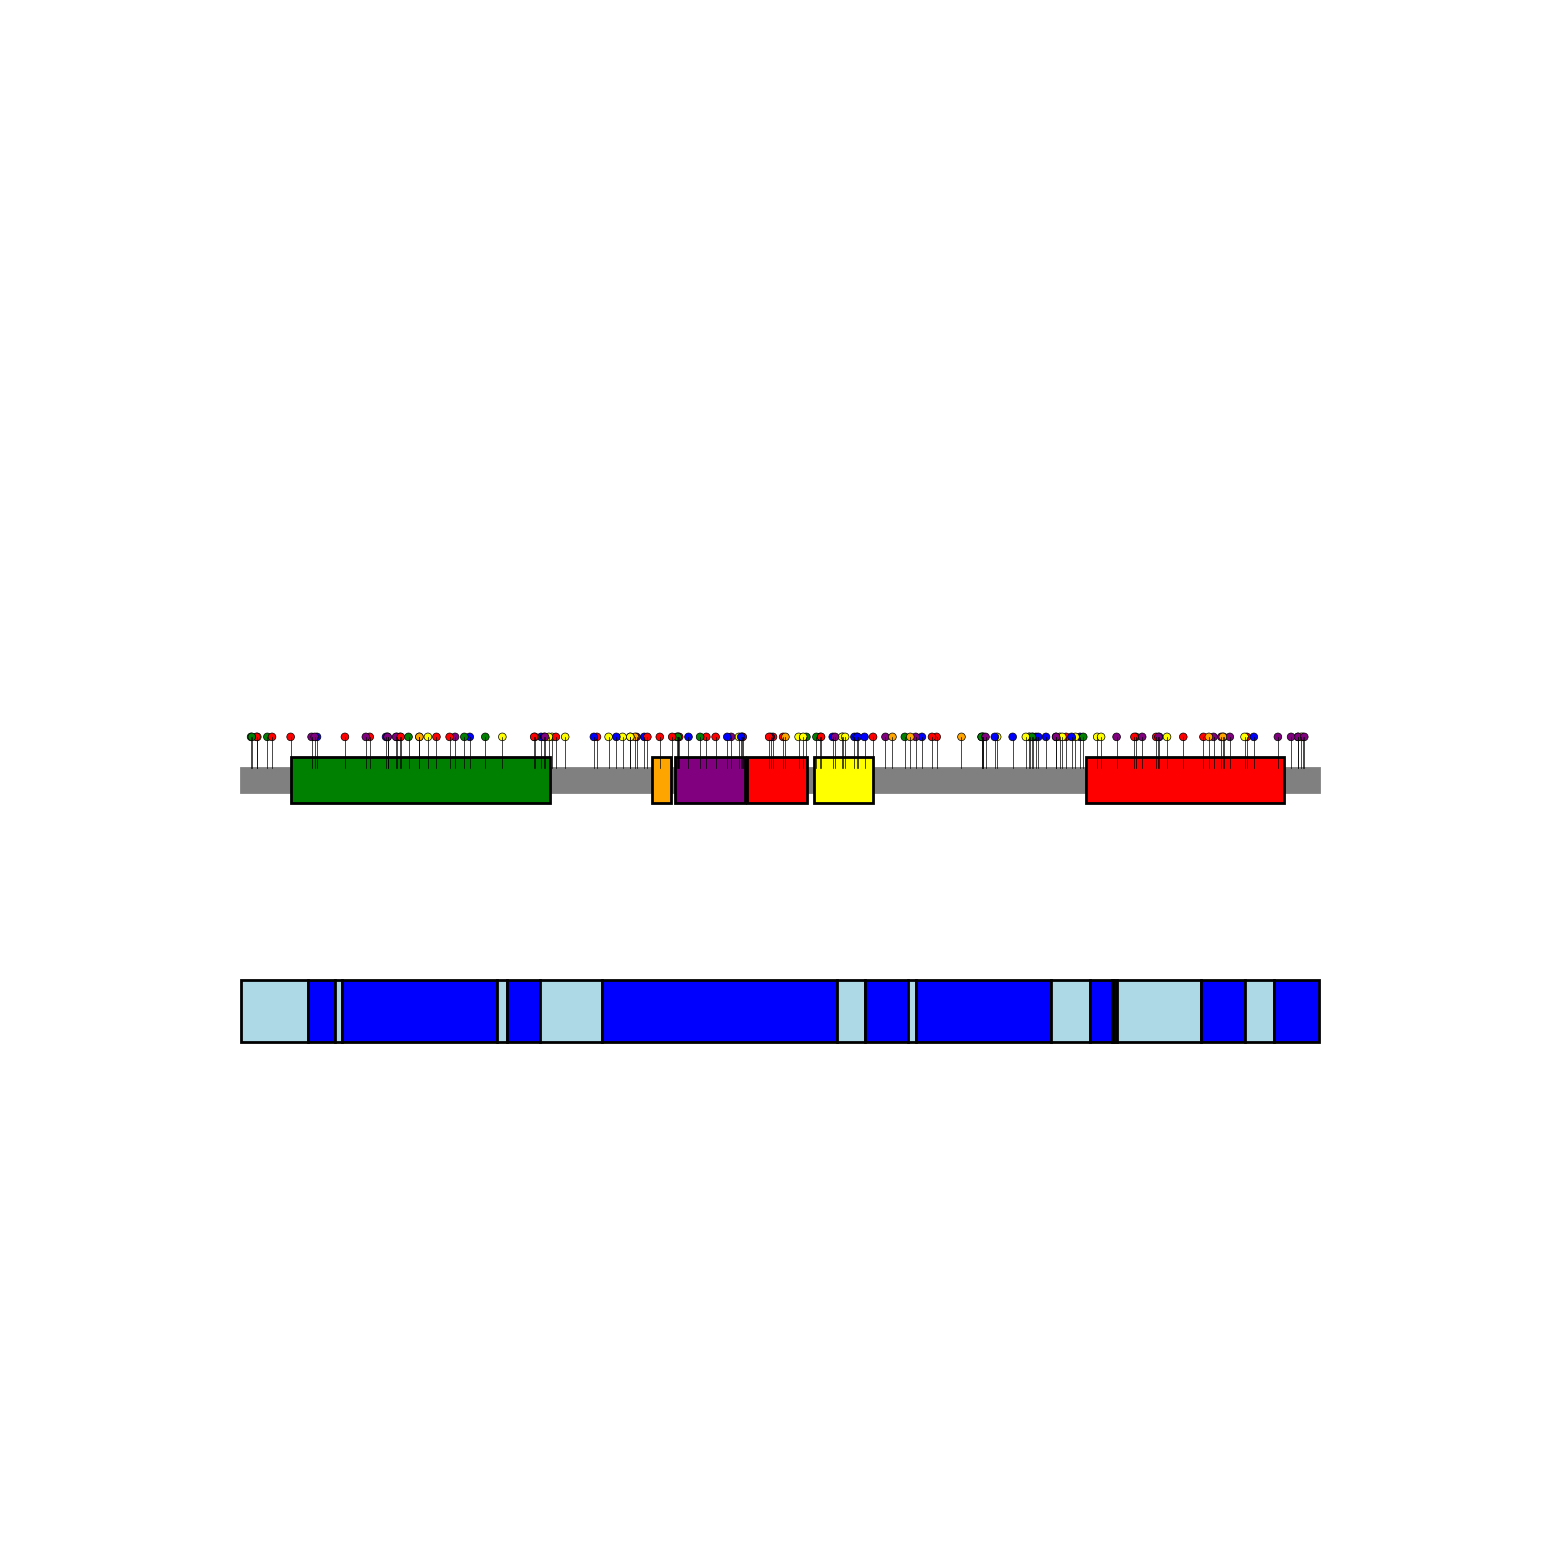

In [127]:
draw_fig(limits, protein_limits, markers)